<a href="https://colab.research.google.com/github/Sigerip/curso-data-viz/blob/main/Demograficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados Demográficos com Seaborn

Neste capítulo, aplicaremos os conhecimentos adquiridos sobre visualização de dados com Seaborn para analisar dados demográficos, com foco em tábuas de mortalidade, expectativa de vida e mortalidade infantil. Esses tipos de dados são fundamentais para compreender a dinâmica populacional e para o planejamento de políticas públicas.

## Introdução aos Dados Demográficos  

Dados demográficos são estatísticas que descrevem características de uma população, como idade, sexo, mortalidade, natalidade, migração, entre outros. Neste capítulo, focaremos em três aspectos importantes:  
  
1. **Tábuas de Mortalidade**: Tabelas que mostram a probabilidade de morte em diferentes idades  
2. **Expectativa de Vida**: Estimativa do número médio de anos que uma pessoa viverá  
3. **Mortalidade Infantil**: Taxa de mortes de crianças menores de um ano  
  
Vamos começar importando as bibliotecas necessárias e configurando o ambiente:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Configurar o estilo
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

## Análise de Tábuas de Mortalidade

As tábuas de mortalidade são ferramentas fundamentais em demografia e atuária. Elas mostram a probabilidade de morte em cada idade e são usadas para calcular a expectativa de vida e para precificar seguros de vida e planos de previdência.

In [2]:
# Careegar Tábuas do Github em formato Parquet
tabua_mas = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/tabua_homens.parquet")
tabua_fem = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/tabua_mulheres.parquet")

# Visualizar primeiras linhas da tábua masculina
print("Tábuas de Mortalidade - Homens")
tabua_mas.head(20)

Tábuas de Mortalidade - Homens


,Ano,Grupo Etário,nMx,nqx,nAx,lx,ndx,nLx,Tx,ex,Local
0,2000,0,0.032572,0.031678,0.133575,100000.000000,3167.836304,97255.308361,6.731573e+06,67.315733,Brasil
1,2000,1-4,0.001249,0.004983,1.557550,96832.163696,482.492585,386150.190896,6.634318e+06,68.513578,Brasil
2,2000,5-9,0.000443,0.002211,2.313050,96349.671112,213.068062,481175.852431,6.248168e+06,64.848875,Brasil
3,2000,10-14,0.000535,0.002672,2.807357,96136.603050,256.849868,480119.835306,5.766992e+06,59.987473,Brasil
4,2000,15-19,0.001947,0.009692,2.856376,95879.753181,929.282967,477406.732610,5.286872e+06,55.140652,Brasil
5,2000,20-24,0.003018,0.014980,2.600570,94950.470215,1422.404906,471339.389459,4.809465e+06,50.652360,Brasil
6,2000,25-29,0.003251,0.016126,2.535952,93528.065309,1508.207527,463924.031337,4.338126e+06,46.383147,Brasil
7,2000,30-34,0.003705,0.018358,2.558702,92019.857782,1689.259671,455975.302341,3.874202e+06,42.101803,Brasil
8,2000,35-39,0.004472,0.022119,2.582464,90330.598111,1998.063773,446822.600221,3.418227e+06,37.841293,Brasil
9,2000,40-44,0.005755,0.028386,2.602459,88332.534338,2507.383188,435651.116613,2.971404e+06,33.638840,Brasil


In [3]:
# Visualizar primeiras linhas da tábua feminina
print("Tábua de Mortalidade - Mulheres")
tabua_fem.head(20)

Tábua de Mortalidade - Mulheres


,Ano,Grupo Etário,nMx,nqx,nAx,lx,ndx,nLx,Tx,ex,Local
0,2000,0,0.024971,0.024436,0.123308,100000.000000,2443.606753,97857.710004,7.507655e+06,75.076554,Brasil
1,2000,1-4,0.001049,0.004185,1.484223,97556.393247,408.240564,389198.530691,7.409798e+06,75.953993,Brasil
2,2000,5-9,0.000310,0.001548,2.250412,97148.152683,150.379710,485327.281146,7.020599e+06,72.266934,Brasil
3,2000,10-14,0.000337,0.001684,2.633627,96997.772973,163.353610,484602.309253,6.535272e+06,67.375483,Brasil
4,2000,15-19,0.000590,0.002948,2.662049,96834.419362,285.482396,483504.653053,6.050670e+06,62.484699,Brasil
5,2000,20-24,0.000738,0.003684,2.593931,96548.936967,355.684265,481888.883943,5.567165e+06,57.661586,Brasil
6,2000,25-29,0.000934,0.004658,2.612628,96193.252702,448.065653,479896.564096,5.085276e+06,52.865205,Brasil
7,2000,30-34,0.001279,0.006377,2.634695,95745.187049,610.566862,477281.758292,4.605379e+06,48.100375,Brasil
8,2000,35-39,0.001805,0.008988,2.651480,95134.620187,855.081803,473664.924060,4.128098e+06,43.392171,Brasil
9,2000,40-44,0.002695,0.013391,2.659413,94279.538384,1262.501249,468442.697466,3.654433e+06,38.761674,Brasil


## Visualização da Probabilidade de Morte (qx)

Vamos visualizar como a probabilidade de morte varia com a idade:

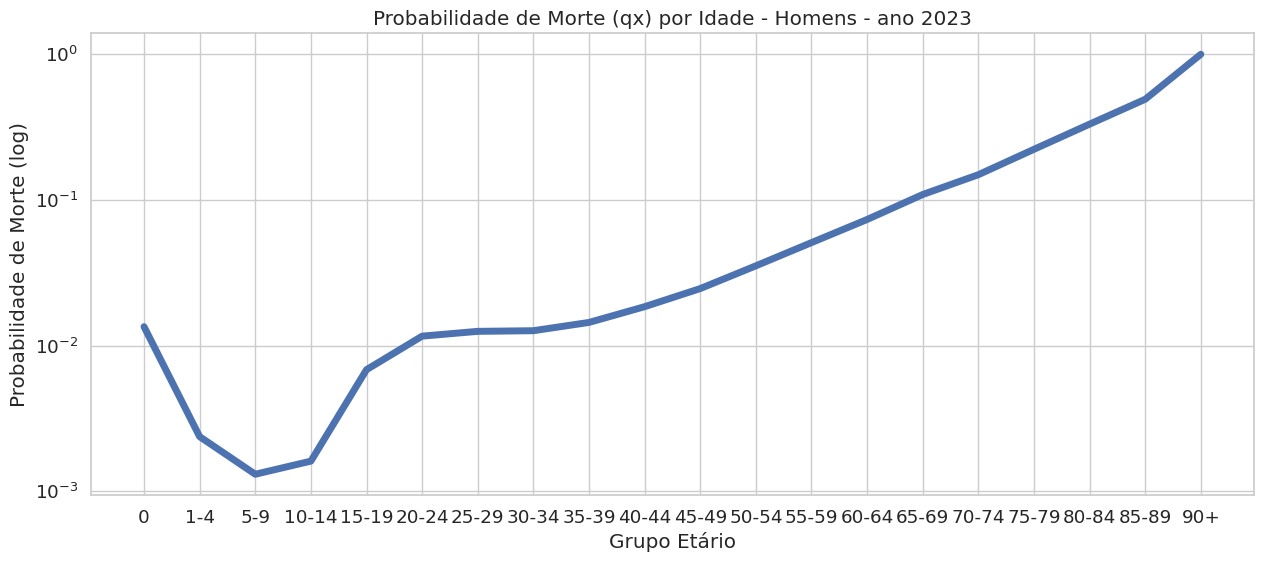

In [43]:
# Filtrar apenas o ano de 2023 para a tábua de mortalidade masculina
tabua_mas_2023 = tabua_mas[tabua_mas['Ano'] == 2023]

# Filtrar apenas o Local Brasil
tabua_mas_2023_br = tabua_mas_2023[tabua_mas_2023['Local'] == 'Brasil']

# Gerar o gráfico
plt.figure(figsize=(15, 6))
sns.lineplot(x='Grupo Etário', y='nqx', data=tabua_mas_2023_br, linewidth=5)
plt.title('Probabilidade de Morte (qx) por Idade - Homens - ano 2023')
plt.xlabel('Grupo Etário')
plt.ylabel('Probabilidade de Morte (log)')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True, which="major", ls="-")
plt.show()

## Comparação de Tábuas de Mortalidade por Sexo

Na prática, as tábuas de mortalidade são diferentes para homens e mulheres. Vamos observar a diferença do comportamento da probabilidade de morte (qx):

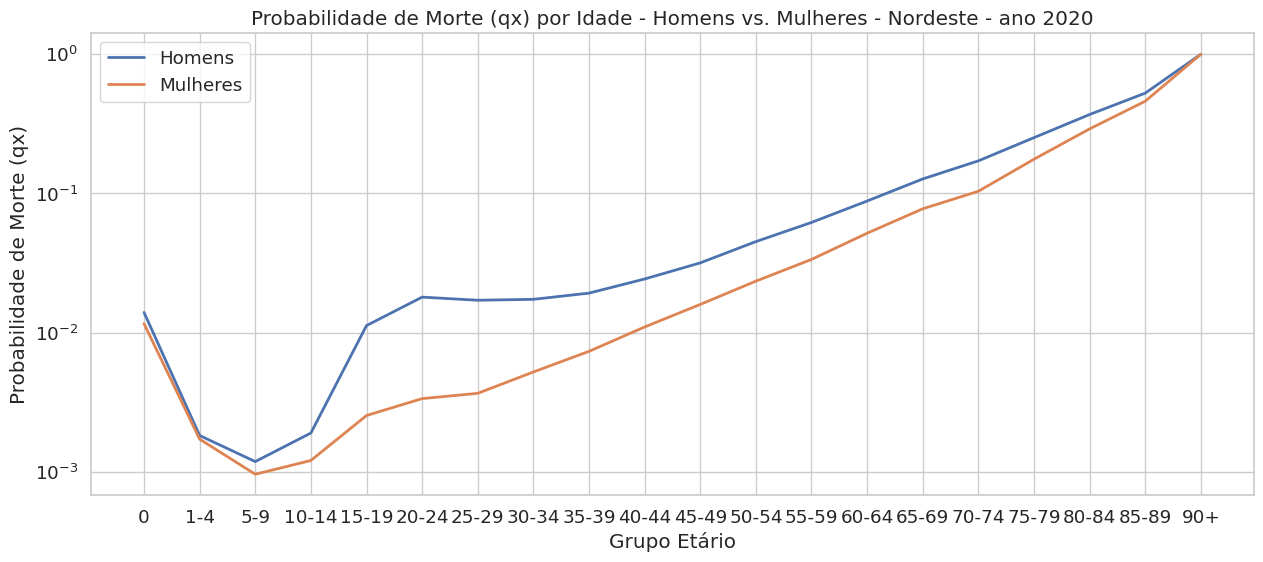

In [5]:
# Filtrar apenas o ano de 2020 para ambas as tábuas
tabua_mas_2020 = tabua_mas[tabua_mas['Ano'] == 2020]
tabua_fem_2020 = tabua_fem[tabua_fem['Ano'] == 2020]

# Filtrar apenas o Local Nordeste para asmbas as tábuas
tabua_mas_2020_ne = tabua_mas_2020[tabua_mas_2020['Local'] == 'Nordeste']
tabua_fem_2020_ne = tabua_fem_2020[tabua_fem_2020['Local'] == 'Nordeste']

# Gerar um gráfico com as duas linhas de probabilidade de morte por grupo etário
plt.figure(figsize=(15, 6))
sns.lineplot(x='Grupo Etário', y='nqx', data=tabua_mas_2020_ne, linewidth=2, label='Homens')
sns.lineplot(x='Grupo Etário', y='nqx', data=tabua_fem_2020_ne, linewidth=2, label='Mulheres')
plt.title('Probabilidade de Morte (qx) por Idade - Homens vs. Mulheres - Nordeste - ano 2020')
plt.xlabel('Grupo Etário')
plt.ylabel('Probabilidade de Morte (qx)')
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.grid(True, which="major", ls="-")
plt.legend()
plt.show()

# Evolução do Comportamento da Probabilidade de Morte

Com dados históricos das tábuas de mortalidade, podemos observar a evolução do comportamento da probabilidade de morte (qx) com o passar dos anos.

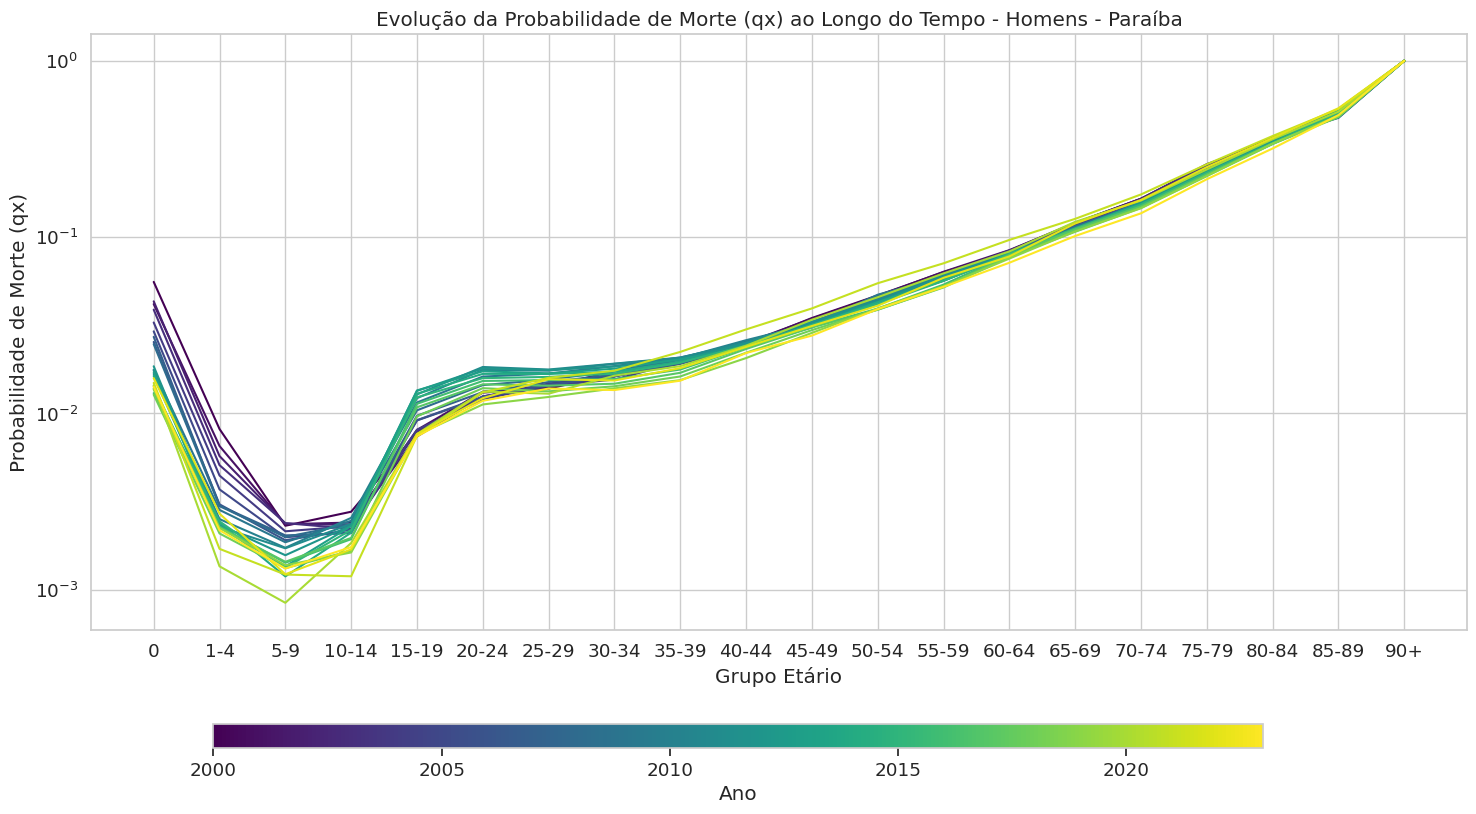

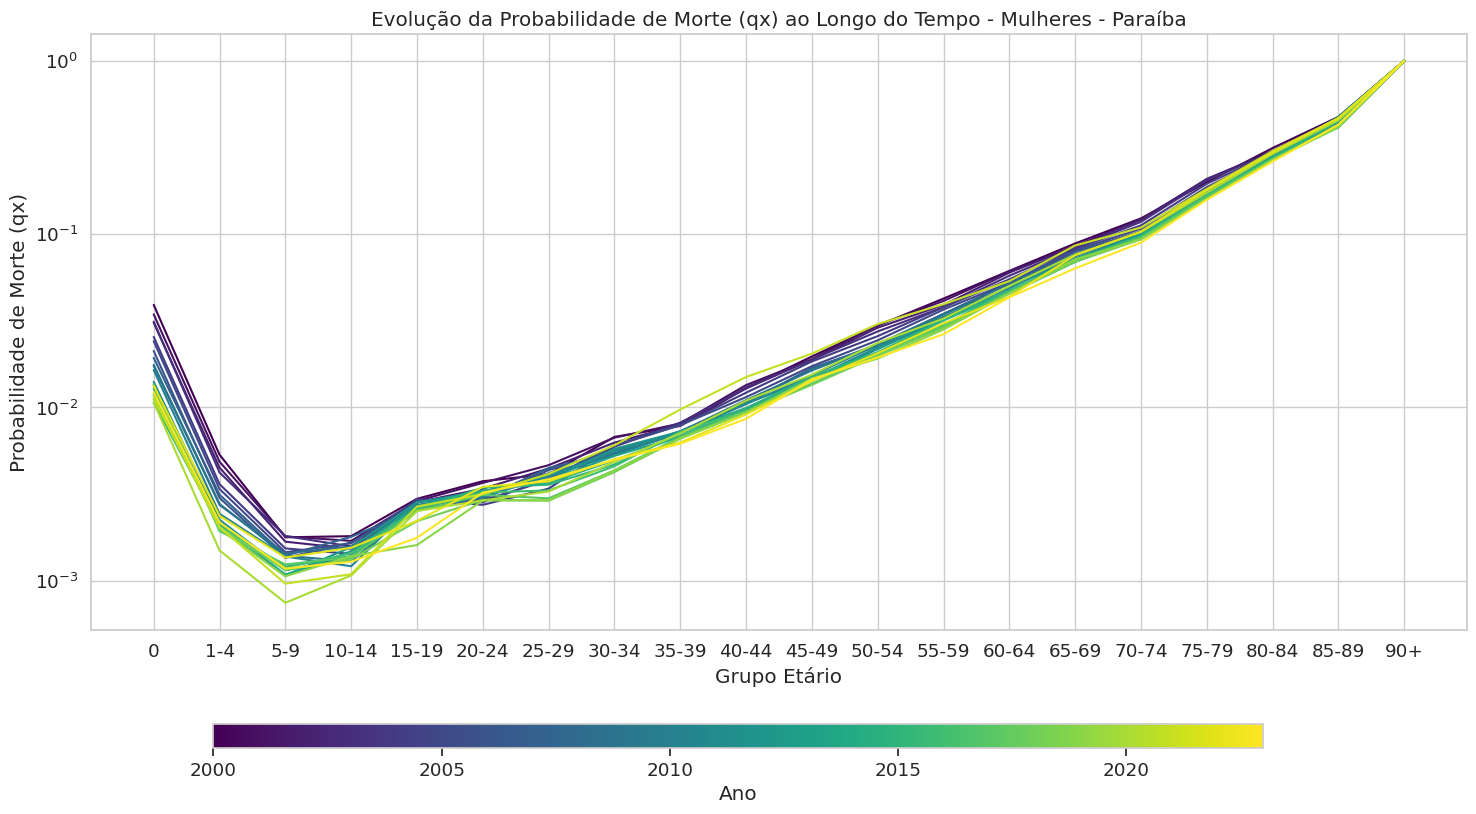

In [6]:
# Função para gerar o gráfico
def plot_qx_evolution(data, title):
    plt.figure(figsize=(15, 8))

    anos = sorted(data['Ano'].unique())
    colors = plt.cm.viridis(np.linspace(0, 1, len(anos)))

    for ano, color in zip(anos, colors):
        dados_ano = data[data['Ano'] == ano]
        sns.lineplot(x='Grupo Etário', y='nqx', data=dados_ano,
                     color=color, label='_nolegend_', linewidth=1.5)

    plt.title(title)
    plt.xlabel('Grupo Etário')
    plt.ylabel('Probabilidade de Morte (qx)')
    plt.yscale('log')
    plt.grid(True, which="major", ls="-")

    norm = mcolors.Normalize(vmin=min(anos), vmax=max(anos))
    sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
    sm.set_array([])

    plt.tight_layout(rect=[0, 0.1, 1, 1])  # Deixa espaço abaixo

    # Barra de cores horizontal
    cbar_ax = plt.gcf().add_axes([0.15, 0.05, 0.7, 0.03])  # [left, bottom, width, height]
    cbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal')
    cbar.set_label('Ano')

    plt.show()

# Filtrar apenas o Local Paraíba para ambas as tábuas
tabua_mas_pb = tabua_mas[tabua_mas['Local'] == 'Paraíba']
tabua_fem_pb = tabua_fem[tabua_fem['Local'] == 'Paraíba']

# Gerar os gráficos
plot_qx_evolution(tabua_mas_pb, 'Evolução da Probabilidade de Morte (qx) ao Longo do Tempo - Homens - Paraíba')
plot_qx_evolution(tabua_fem_pb, 'Evolução da Probabilidade de Morte (qx) ao Longo do Tempo - Mulheres - Paraíba')

## Análise de Expectativa de Vida

A expectativa de vida é uma medida estatística que indica o número médio de anos que uma pessoa viverá a partir de uma determinada idade. Vamos visualizar a expectativa de vida em diferentes idades:

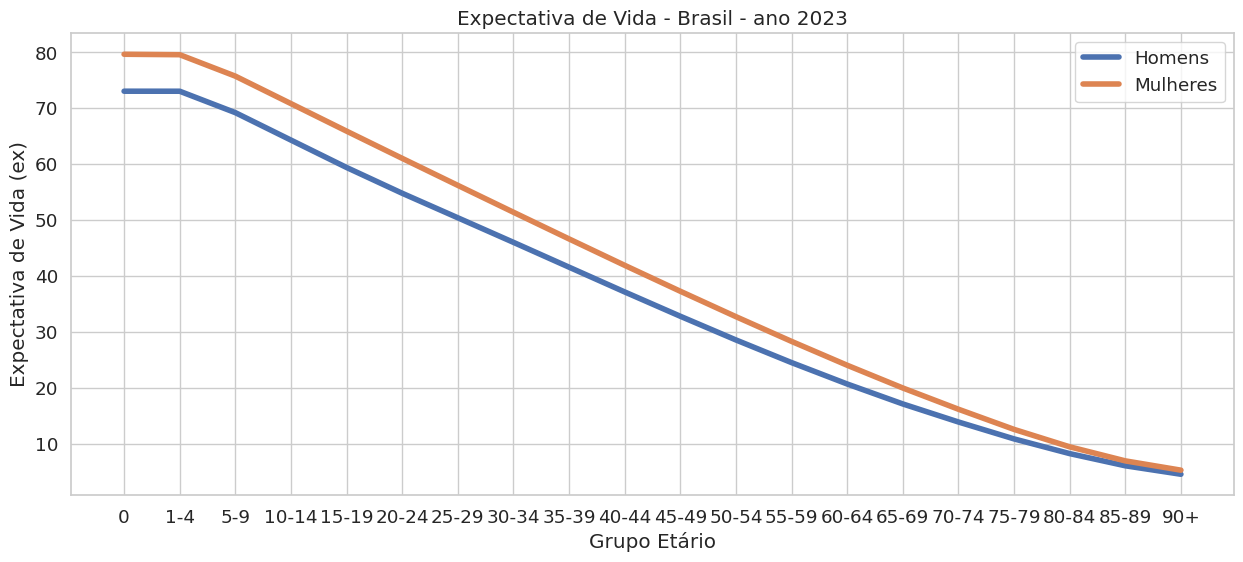

In [42]:
# Filtrar apenas o Local Brasil para ambas as tábuas
tabua_mas_br = tabua_mas[tabua_mas['Local'] == 'Brasil']
tabua_fem_br = tabua_fem[tabua_fem['Local'] == 'Brasil']

# Gráfico da Expectativa de Vida para os dois sexos no ano de 2023
plt.figure(figsize=(15, 6))
sns.lineplot(x='Grupo Etário', y='ex', data=tabua_mas_br[tabua_mas_br['Ano'] == 2023], linewidth=4, label='Homens')
sns.lineplot(x='Grupo Etário', y='ex', data=tabua_fem_br[tabua_fem_br['Ano'] == 2023], linewidth=4, label='Mulheres')
plt.title('Expectativa de Vida - Brasil - ano 2023')
plt.xlabel('Grupo Etário')
plt.ylabel('Expectativa de Vida (ex)')
plt.grid(True, which="major", ls="-")
plt.show()

## Evolução da Expectativa de Vida ao Longo do Tempo

A expectativa de vida tem aumentado ao longo do tempo devido a melhorias na saúde pública, nutrição, medicina, entre outros fatores. Vamos visualizar essa evolução:

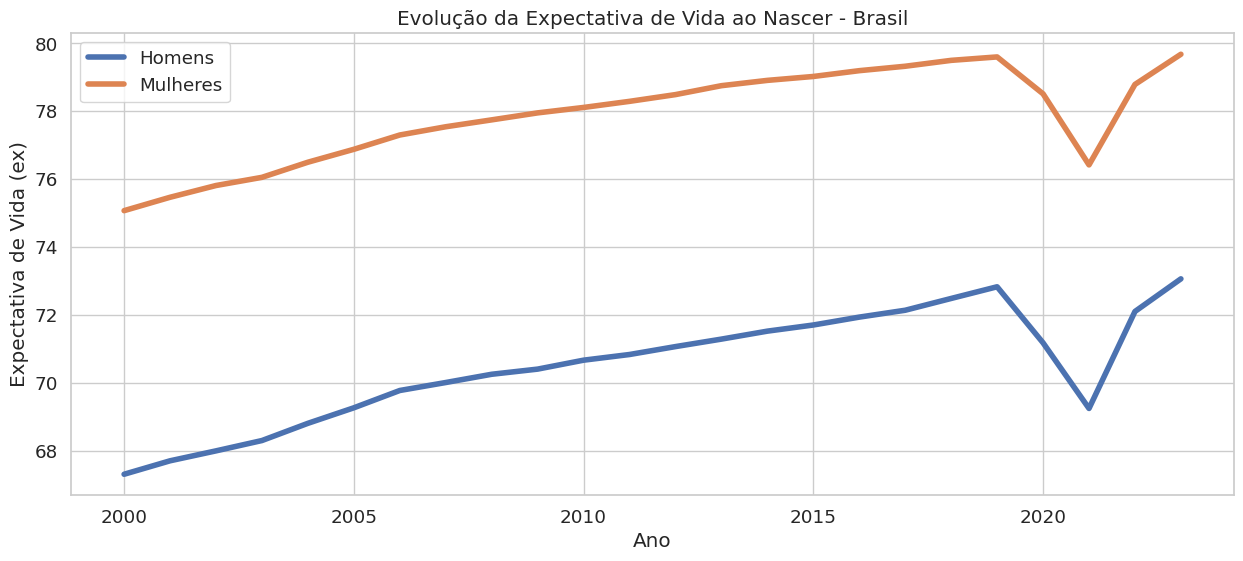

In [44]:
# Filtrar apenas o Local Brasil para ambas as tábuas
tabua_mas_br = tabua_mas[tabua_mas['Local'] == 'Brasil']
tabua_fem_br = tabua_fem[tabua_fem['Local'] == 'Brasil']

# Filtrar apenas o Grupo Etário 0 para ambas as tábuas
tabua_mas_br_0 = tabua_mas_br[tabua_mas_br['Grupo Etário'] == '0']
tabua_fem_br_0 = tabua_fem_br[tabua_fem_br['Grupo Etário'] == '0']

# Gráfico da Evolução da Expectativa de Vida ao Nascer para Homens e Mulheres
plt.figure(figsize=(15, 6))
sns.lineplot(x='Ano', y='ex', data=tabua_mas_br_0, linewidth=4, label='Homens')
sns.lineplot(x='Ano', y='ex', data=tabua_fem_br_0, linewidth=4, label='Mulheres')
plt.title('Evolução da Expectativa de Vida ao Nascer - Brasil')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (ex)')
plt.grid(True, which="major", ls="-")
plt.show()

## Comparação da Expectativa de Vida entre Regiões

A expectativa de vida varia significativamente entre países, regiões e estados devido a diferenças socioeconômicas, sistemas de saúde, entre outros fatores.

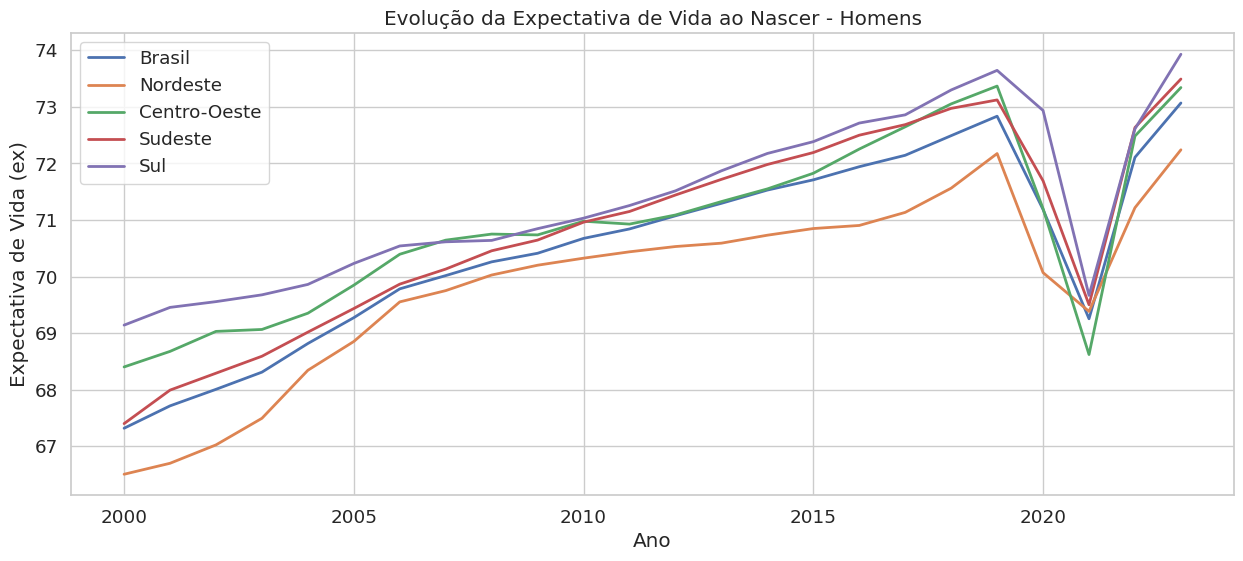

In [9]:
# Filtrar as regiões para a tábua masculina
tabua_mas_reg = tabua_mas[tabua_mas['Local'].isin(['Brasil', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'])]

# Isolar a tábua de cada região
tabua_mas_br = tabua_mas_reg[tabua_mas_reg['Local'] == 'Brasil']
tabua_mas_ne = tabua_mas_reg[tabua_mas_reg['Local'] == 'Nordeste']
tabua_mas_no = tabua_mas_reg[tabua_mas_reg['Local'] == 'Centro-Oeste']
tabua_mas_se = tabua_mas_reg[tabua_mas_reg['Local'] == 'Sudeste']
tabua_mas_su = tabua_mas_reg[tabua_mas_reg['Local'] == 'Sul']

# Filtrar o Grupo Etário 0 para todas as tábuas
tabua_mas_br_0 = tabua_mas_br[tabua_mas_br['Grupo Etário'] == '0']
tabua_mas_ne_0 = tabua_mas_ne[tabua_mas_ne['Grupo Etário'] == '0']
tabua_mas_no_0 = tabua_mas_no[tabua_mas_no['Grupo Etário'] == '0']
tabua_mas_se_0 = tabua_mas_se[tabua_mas_se['Grupo Etário'] == '0']
tabua_mas_su_0 = tabua_mas_su[tabua_mas_su['Grupo Etário'] == '0']

# Gráfico da Evolução da Expectativa de Vida ao Nascer de Homens por Região
plt.figure(figsize=(15, 6))
sns.lineplot(x='Ano', y='ex', data=tabua_mas_br_0, linewidth=2, label='Brasil')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_ne_0, linewidth=2, label='Nordeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_no_0, linewidth=2, label='Centro-Oeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_se_0, linewidth=2, label='Sudeste')
sns.lineplot(x='Ano', y='ex', data=tabua_mas_su_0, linewidth=2, label='Sul')
plt.title('Evolução da Expectativa de Vida ao Nascer - Homens')
plt.xlabel('Ano')
plt.ylabel('Expectativa de Vida (ex)')
plt.grid(True, which="major", ls="-")
plt.legend()
plt.show()

## Análise de Mortalidade Infantil

A mortalidade infantil é um indicador importante da saúde pública e do desenvolvimento socioeconômico de um país.

In [13]:
# Carregar Base de Dados de Mortalidade Infantil - municípios e regiões
mort_inf_mun = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/taxas_mortal_inf_mun.parquet")
mort_inf_reg = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/taxas_mortal_inf_brreuf.parquet")

# Visualizar primeiras linhas do banco de dados municipal
print("Mortalidade Infantil - Municípios")
mort_inf_mun.head(20)

Mortalidade Infantil - Municípios


,Localidade,Código IBGE,Código DataSUS,Ano,Taxa
0,Município Ignorado -RO,1100000,110000,1990,NaN
1,Município Ignorado -RO,1100000,110000,1991,NaN
2,Município Ignorado -RO,1100000,110000,1992,NaN
3,Município Ignorado -RO,1100000,110000,1993,NaN
4,Município Ignorado -RO,1100000,110000,1994,NaN
5,Município Ignorado -RO,1100000,110000,1995,NaN
6,Município Ignorado -RO,1100000,110000,1996,900.00
7,Município Ignorado -RO,1100000,110000,1997,1000.00
8,Município Ignorado -RO,1100000,110000,1998,2448.28
9,Município Ignorado -RO,1100000,110000,1999,274.13


In [14]:
# Visalizar as primeiras linhas do banco de dados regiões
print("Mortalidade Infantil - Regiões")
mort_inf_reg.head(20)

Mortalidade Infantil - Regiões


,Localidade,Código IBGE,Código DataSUS,Ano,Taxa
0,Brasil,0,0,1990,47.10
1,Brasil,0,0,1991,44.39
2,Brasil,0,0,1992,41.85
3,Brasil,0,0,1993,39.45
4,Brasil,0,0,1994,37.20
5,Brasil,0,0,1995,35.07
6,Brasil,0,0,1996,33.06
7,Brasil,0,0,1997,31.17
8,Brasil,0,0,1998,29.38
9,Brasil,0,0,1999,27.70


## Comparação da Mortalidade Infatil entre Regiões

A mortalidade infantil varia significativamente entre diferentes municípios e regiões. Vamos visualizar essas diferenças:

<ipython-input-37-1fb14b6668ff>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Localidade', y='Taxa', data=mort_inf_br_ne_2010.sort_values(by='Taxa'), palette="viridis")


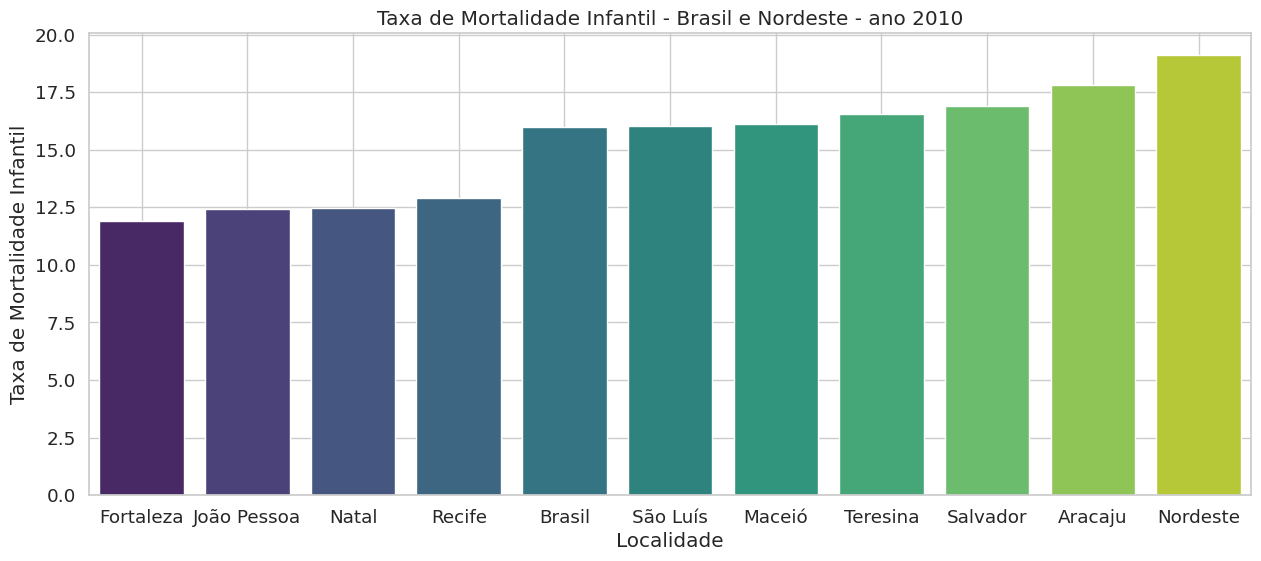

In [37]:
# Filtrar apenas as capitais nordestinas da base municipal
mort_inf_mun_cap = mort_inf_mun[mort_inf_mun['Localidade'].isin(['Salvador', 'Maceió', 'Aracaju', 'Recife', 'João Pessoa',
                                                    'Natal', 'Fortaleza', 'Teresina', 'São Luís'])]

# Filtrar Brasil e Nordeste da base regiões
mort_inf_reg_br = mort_inf_reg[mort_inf_reg['Localidade'].isin(['Brasil', 'Nordeste'])]

# Juntar as duas novas bases
mort_inf_br_ne = pd.concat([mort_inf_mun_cap, mort_inf_reg_br])

# Filtrar apenas o ano de 2010
mort_inf_br_ne_2010 = mort_inf_br_ne[mort_inf_br_ne['Ano'] == 2010]

# Gráfico em barras da Taxa de Mortalidade Infantil do ano de 2010 ordenada e escala de cores
plt.figure(figsize=(15, 6))
sns.barplot(x='Localidade', y='Taxa', data=mort_inf_br_ne_2010.sort_values(by='Taxa'), palette="viridis")
plt.title('Taxa de Mortalidade Infantil - Brasil e Nordeste - ano 2010')
plt.xlabel('Localidade')
plt.ylabel('Taxa de Mortalidade Infantil')
plt.grid(True, which="major", ls="-")
plt.show()

## Evolução das Taxas de Mortalidade

Desde 2000, as taxas de mortalidade infantil vêm caindo de forma consistente, refletindo avanços em saúde pública, saneamento e acesso a serviços essenciais, como mostra o gráfico a seguir.

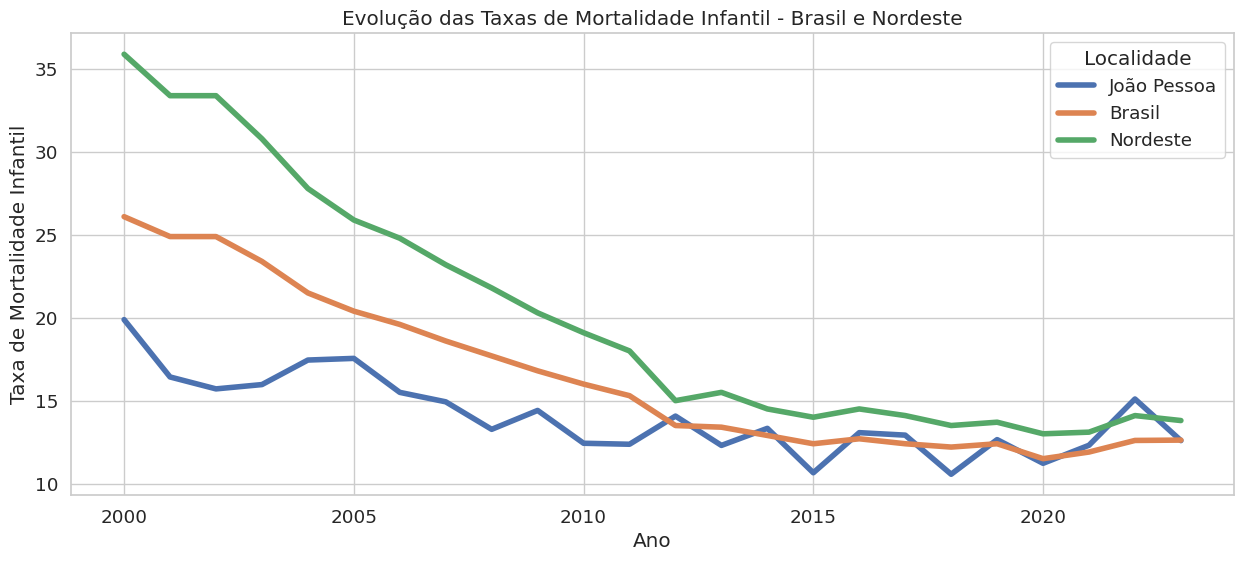

In [41]:
# Filtrar a base de dados a partir do ano 2000
mort_inf_br_ne_2000 = mort_inf_br_ne[mort_inf_br_ne['Ano'] >= 2000]

# Filtrar apenas Brasil, Nordeste e João Pessoa
mort_inf_br_ne_2000 = mort_inf_br_ne_2000[mort_inf_br_ne_2000['Localidade'].isin(['Brasil', 'Nordeste', 'João Pessoa'])]

# Gráfico de Evolução das Taxas de Mortalidade Infantil comparativa das capitais nordestinas
plt.figure(figsize=(15, 6))
sns.lineplot(x='Ano', y='Taxa', hue='Localidade', data=mort_inf_br_ne_2000, linewidth=4)
plt.title('Evolução das Taxas de Mortalidade Infantil - Brasil e Nordeste')
plt.xlabel('Ano')
plt.ylabel('Taxa de Mortalidade Infantil')
plt.grid(True, which="major", ls="-")
plt.legend(title='Localidade')
plt.show()

## Pirâmides Etárias

As pirâmides etárias são fundamentais para compreender a estrutura da população, revelando tendências de envelhecimento, fecundidade e expectativa de vida ao longo do tempo, como ilustrado nos gráficos a seguir.

In [46]:
# Carregar base de dados populacionais
pop_bra = pd.read_parquet("https://raw.githubusercontent.com/Sigerip/curso-data-viz/main/populacao_completa.parquet")

# Visualizar primeiras linhas da base de dados
pop_bra.head(19)

,Local,Ano,Grupo Etário,Homens,Mulheres,Ambos
0,Brasil,2000,00-04,8739233,8542314,17281547
1,Brasil,2000,05-09,8710340,8668650,17378990
2,Brasil,2000,10-14,8800488,8798890,17599378
3,Brasil,2000,15-19,8880452,8950892,17831344
4,Brasil,2000,20-24,8118846,8283382,16402228
5,Brasil,2000,25-29,7067716,7284148,14351864
6,Brasil,2000,30-34,6565143,6857096,13422239
7,Brasil,2000,35-39,6065904,6400789,12466693
8,Brasil,2000,40-44,5273405,5563053,10836458
9,Brasil,2000,45-49,4381441,4632276,9013717


<ipython-input-49-a06db4baf932>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_bra_2023['Homens_%'] = (pop_bra_2023['Homens'] / populacao_total) * 100
<ipython-input-49-a06db4baf932>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_bra_2023['Mulheres_%'] = (pop_bra_2023['Mulheres'] / populacao_total) * 100


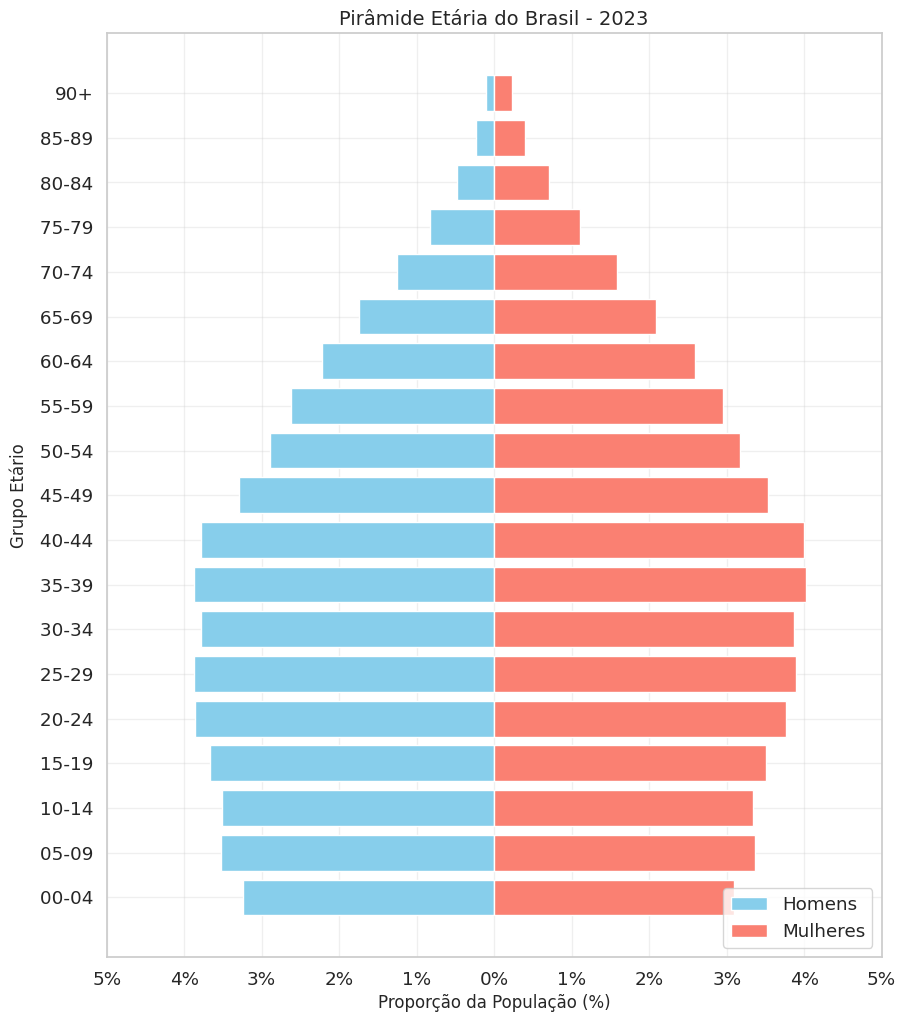

In [49]:
# Filtrar apenas o Local Brasil e o ano de 2023
pop_bra_2023 = pop_bra[(pop_bra['Local'] == 'Brasil') & (pop_bra['Ano'] == 2023)]

# Calcular as proporções dos grupos etários de cada sexo
populacao_total = pop_bra_2023['Ambos'].sum()
pop_bra_2023['Homens_%'] = (pop_bra_2023['Homens'] / populacao_total) * 100
pop_bra_2023['Mulheres_%'] = (pop_bra_2023['Mulheres'] / populacao_total) * 100

# Configurar o gráfico
plt.figure(figsize=(10, 12))
sns.set_style("whitegrid")

# Barras para homens (lado esquerdo, negativo)
plt.barh(
    pop_bra_2023['Grupo Etário'],
    -pop_bra_2023['Homens_%'],
    color='skyblue',
    label='Homens'
)

# Barras para mulheres (lado direito, positivo)
plt.barh(
    pop_bra_2023['Grupo Etário'],
    pop_bra_2023['Mulheres_%'],
    color='salmon',
    label='Mulheres'
)

# Ajustes estéticos
plt.title('Pirâmide Etária do Brasil - 2023', fontsize=14)
plt.xlabel('Proporção da População (%)', fontsize=12)
plt.ylabel('Grupo Etário', fontsize=12)
plt.xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
           ['5%', '4%', '3%', '2%', '1%', '0%', '1%', '2%', '3%', '4%', '5%'])
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.show()


### Pirâmides Etárias comparadas

As pirâmides etárias comparativas permitem visualizar mudanças demográficas entre diferentes períodos ou regiões, facilitando a análise de transições populacionais, como o envelhecimento ou a queda na natalidade, evidenciadas nos gráficos a seguir.

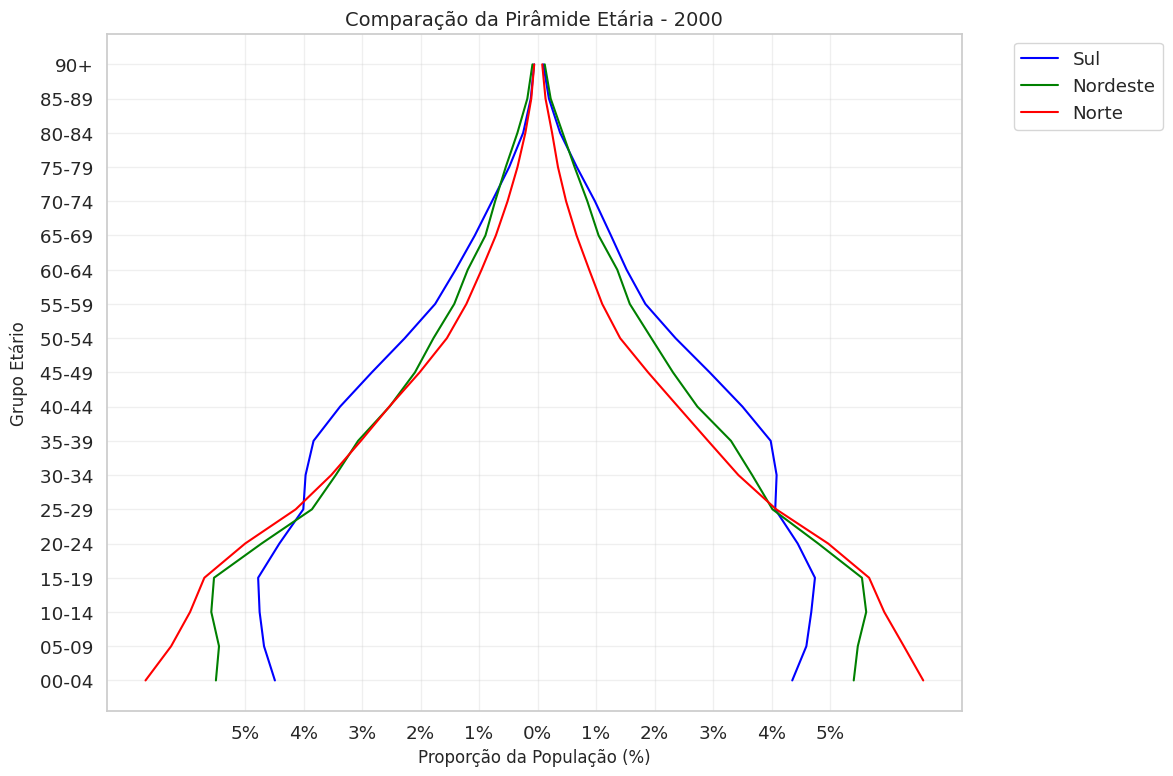

In [58]:
# Filtrar Local Sul, Nordeste e Norte
pop_br_ne_pb = pop_bra[(pop_bra['Local'].isin(['Sul', 'Nordeste', 'Norte']))]

# Filtrar o ano de 2000
pop_br_ne_pb = pop_br_ne_pb[pop_br_ne_pb['Ano'] == 2000]

# Calcular proporções em relação à população total de cada local
for local in ['Sul', 'Nordeste', 'Norte']:
    df_local = pop_br_ne_pb[pop_br_ne_pb['Local'] == local]
    total_local = df_local['Ambos'].sum()
    pop_br_ne_pb.loc[pop_br_ne_pb['Local'] == local, 'Homens_%'] = (df_local['Homens'] / total_local) * 100
    pop_br_ne_pb.loc[pop_br_ne_pb['Local'] == local, 'Mulheres_%'] = (df_local['Mulheres'] / total_local) * 100

# Configurar o gráfico
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Cores para cada região
cores = {
    'Sul': 'blue',
    'Nordeste': 'green',
    'Norte': 'red'
}

# Plotar linhas para Homens (valores negativos)
for local in ['Sul', 'Nordeste', 'Norte']:
    df_plot = pop_br_ne_pb[pop_br_ne_pb['Local'] == local]
    plt.plot(
        -df_plot['Homens_%'],
        df_plot['Grupo Etário'],
        linestyle='-',
        color=cores[local],
        label=local
            )

# Plotar linhas para Mulheres (valores positivos)
for local in ['Sul', 'Nordeste', 'Norte']:
    df_plot = pop_br_ne_pb[pop_br_ne_pb['Local'] == local]
    plt.plot(
        df_plot['Mulheres_%'],
        df_plot['Grupo Etário'],
        linestyle='-',
        color=cores[local],
                    )

# Ajustes estéticos
plt.title('Comparação da Pirâmide Etária - 2000', fontsize=14)
plt.xlabel('Proporção da População (%)', fontsize=12)
plt.ylabel('Grupo Etário', fontsize=12)
plt.xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5],
           ['5%', '4%', '3%', '2%', '1%', '0%', '1%', '2%', '3%', '4%', '5%'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusão

Neste capítulo, exploramos como o Seaborn pode ser usado para analisar e visualizar dados demográficos, com foco em tábuas de mortalidade, expectativa de vida e mortalidade infantil. Essas visualizações são fundamentais para compreender a dinâmica populacional e para o planejamento de políticas públicas.